<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/2_%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%8C%8C%EC%9D%BC%EC%9D%98_%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np

In [ ]:
folder = '/content/gdrive/MyDrive/pytest_img/mnist_jpg'

In [ ]:
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
print(files)
print("Working with {0} images ".format(len(files)))

['img_3_ (10).jpg', 'img_8_ (5).jpg', 'img_7_ (5).jpg', 'img_8_ (7).jpg', 'img_9_ (8).jpg', 'img_0_ (5).jpg', 'img_9_ (7).jpg', 'img_5_ (7).jpg', 'img_0_ (9).jpg', 'img_8_ (9).jpg', 'img_5_ (5).jpg', 'img_7_ (7).jpg', 'img_6_ (6).jpg', 'img_8_ (6).jpg', 'img_0_ (7).jpg', 'img_1_ (9).jpg', 'img_6_ (9).jpg', 'img_2_ (10).jpg', 'img_5_ (10).jpg', 'img_2_ (6).jpg', 'img_2_ (5).jpg', 'img_7_ (10).jpg', 'img_5_ (8).jpg', 'img_4_ (10).jpg', 'img_0_ (6).jpg', 'img_4_ (8).jpg', 'img_4_ (6).jpg', 'img_2_ (7).jpg', 'img_7_ (6).jpg', 'img_6_ (8).jpg', 'img_6_ (7).jpg', 'img_5_ (9).jpg', 'img_4_ (5).jpg', 'img_3_ (7).jpg', 'img_9_ (9).jpg', 'img_6_ (10).jpg', 'img_8_ (4).jpg', 'img_8_ (10).jpg', 'img_2_ (9).jpg', 'img_2_ (8).jpg', 'img_1_ (10).jpg', 'img_7_ (8).jpg', 'img_1_ (5).jpg', 'img_9_ (5).jpg', 'img_6_ (4).jpg', 'img_5_ (2).jpg', 'img_1_ (4).jpg', 'img_1_ (8).jpg', 'img_4_ (2).jpg', 'img_0_ (3).jpg', 'img_0_ (4).jpg', 'img_2_ (2).jpg', 'img_7_ (4).jpg', 'img_0_ (10).jpg', 'img_9_ (2).jpg', 

In [ ]:
for i in range(0, 2):
    print(files[i])
    display(_Imgdis(filename=folder + "/" + files[i], width=30, height=40))

img_3_ (10).jpg


img_8_ (5).jpg


In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
file_names = []
file_labels = []

In [ ]:
for _file in files:
    file_names.append(_file)
    label_start = _file.find("_")+1
    label_end = _file.find("_ (")
    file_labels.append(int(_file[label_start:label_end]))

print("Files in folder: %d" % len(file_names))

Files in folder: 100


In [ ]:
os.chdir(folder)

In [ ]:
!pwd

/content/gdrive/MyDrive/pytest_img/mnist_jpg


In [ ]:
img = load_img(file_names[0])
print("Original:", type(img))

Original: <class 'PIL.Image.Image'>


In [ ]:
img_array = img_to_array(img)

print("NumPy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print("shape:", img_array.shape)



NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (28, 28, 3)


In [ ]:
image_height = img_array.shape[0]
image_width = img_array.shape[1]
channels = img_array.shape[2]

dataset = np.ndarray(shape=(len(file_names), image_height, image_width, channels), dtype=np.int32)
print(dataset.shape)

(100, 28, 28, 3)


In [ ]:
#file_names

In [ ]:
for count, item in enumerate(file_names):
    img = load_img(file_names[count])
    img_array = img_to_array(img)
    img_array = img_array.reshape(28,28,3)
    dataset[count] = img_array

    if count % 5000 == 0:
        print("%d images to array" % count)

print("모든 이미지가 배열로 변환되었습니다!")

0 images to array
모든 이미지가 배열로 변환되었습니다!


In [ ]:
dataset[0]

array([[[ 3,  3,  3],
        [ 0,  0,  0],
        [ 4,  4,  4],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [11, 11, 11],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=int32)

In [ ]:
print(dataset.shape)
print(file_labels[40])

(100, 28, 28, 3)
1


In [ ]:
display(_Imgdis(filename=folder + "/" + files[40], width=30, height=40))

In [ ]:
np.set_printoptions(linewidth=np.inf)
print(dataset[40,:,:,0])

[[  0   0   0   0   0   0   0   0   5   0   0   4   1   0   5   0   4   0   0   2   0   0   3   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   5   0   0  15   0   7   4   2   7   7   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4  11   0   0   6   0   2   0   0   3   3   0   1   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10   2  63 194  77  12   0   0   2   0   0   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0   2   0  54 255 241 241  47  11   0   7   5   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9   0  33 241 234 248 255  44   7   0   4   4   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3  65 242 238 255 253 245   9   0   0   0   0   2   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  82 228 255 255 251 255 237   0   0   7   1   0   6   9   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5 173 245 255 199 248 249 145   0   0   0   

In [ ]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(dataset, file_labels, test_size=0.2, stratify=file_labels)

print("Train set size: {0}, Test set size: {1}".format(len(train_images), len(test_images)))

Train set size: 80, Test set size: 20


In [ ]:
from keras import models
from keras import layers
import numpy as np

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(28,28,3)))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,200,458 (4.58 MB)

 Trainable params: 1,200,458 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
from tensorflow.keras.utils import to_categorical
train_lables = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
history = model.fit(train_images, train_lables, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - acc: 0.0484 - loss: 2.4573 - val_acc: 0.3000 - val_loss: 2.0922
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - acc: 0.4828 - loss: 1.9400 - val_acc: 0.5500 - val_loss: 1.4592
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - acc: 0.5805 - loss: 1.4100 - val_acc: 0.5000 - val_loss: 1.3697
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - acc: 0.7102 - loss: 0.8850 - val_acc: 0.7000 - val_loss: 0.8406
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - acc: 0.8734 - loss: 0.4789 - val_acc: 0.7500 - val_loss: 0.7490


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Validation Accuracy of each epoch:',val_acc)

Validation Accuracy of each epoch: [0.30000001192092896, 0.550000011920929, 0.5, 0.699999988079071, 0.75]


In [ ]:
print(val_loss)

[2.09218168258667, 1.4592297077178955, 1.369704008102417, 0.8405739665031433, 0.7490034103393555]


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.7500 - loss: 0.7490
Test accuracy: 0.75


In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(val_acc) + 1)

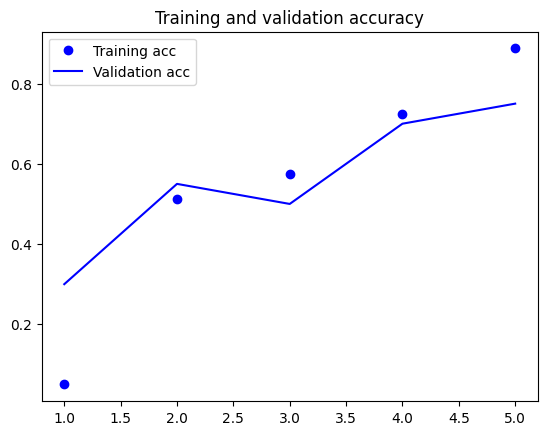

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()

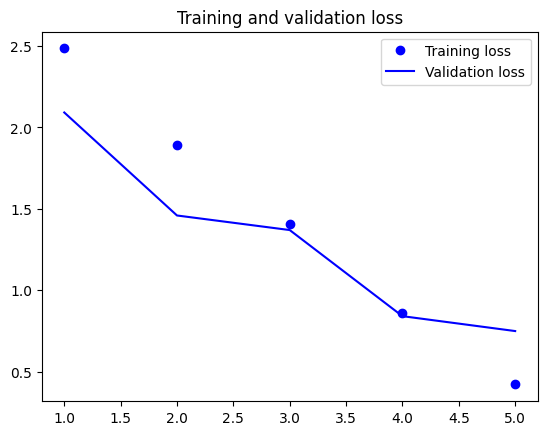

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Cats and Dogs

In [ ]:
folder = '/content/gdrive/MyDrive/pytest_img/cats_dogs'
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(files)))

Working with 60 images


cat.21.jpg


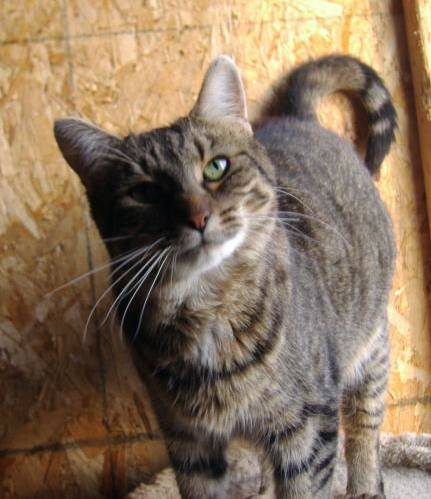

dog.28.jpg


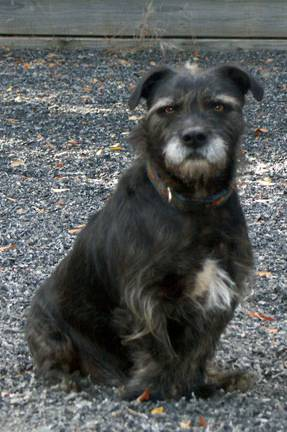

In [ ]:
for i in range(0, 2):
    print(files[i])
    display(_Imgdis(filename=folder + "/" + files[i], width=120, height=160))

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
file_names = []
file_labels = []

for _file in files:
    file_names.append(_file)
    label_start = 0
    label_end = _file.find(".")
    label_str = _file[label_start:label_end]

    if label_str == "cat":
        file_labels.append(0)
    elif label_str == "dog":
        file_labels.append(1)
    else:
        print("Error!")

print("Files in folder: %d" % len(file_names))


Files in folder: 60


In [ ]:
os.chdir(folder)

img = load_img(file_names[0])
print("Original:", type(img))

img_array = img_to_array(img)

print("NumPy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print("shape:", img_array.shape)

Original: <class 'PIL.JpegImagePlugin.JpegImageFile'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (499, 431, 3)


In [ ]:
img = load_img(file_names[1])
print("Original:", type(img))

img_array = img_to_array(img)

print("NumPy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print("shape:", img_array.shape)

Original: <class 'PIL.JpegImagePlugin.JpegImageFile'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (432, 287, 3)


In [ ]:
image_height = 20
image_width = 20
channels = 3

dataset = np.ndarray(shape=(len(file_names), image_height, image_width, channels), dtype=np.int32)
print(dataset.shape)

(60, 20, 20, 3)


In [ ]:
import os
if not os.path.exists(os.path.join(folder, 'new/')):
    os.makedirs(os.path.join(folder, 'new/'))

In [ ]:
from PIL import Image
for count, item in enumerate(file_names):
    img = load_img(file_names[count])
    img = img.resize((20,20), Image.Resampling.LANCZOS)
    img.save(fp=os.path.join(folder, 'new/') + file_names[count])

In [ ]:
for count, item in enumerate(file_names):
    img = load_img(os.path.join(folder, 'new/') + file_names[count])
    img_array = img_to_array(img)
    dataset[count] = img_array

    if count % 10 == 0:
        print(f"{count} images to array")

print("모든 이미지가 배열로 변환되었습니다!")

0 images to array
10 images to array
20 images to array
30 images to array
40 images to array
50 images to array
모든 이미지가 배열로 변환되었습니다!


In [ ]:
print(dataset.shape)
print(file_labels[30])

display(_Imgdis(filename=os.path.join(folder, 'new') + "/" + files[30], width=100, height=100))

(60, 20, 20, 3)
0


In [ ]:
np.set_printoptions(linewidth=np.inf)
print(dataset[30,:,:,0])

[[ 29  34  49  72 131 185 248 243 216 255 197 171 175 238 212 178 179 151 177 176]
 [ 27  24  49  82 132 179 249 248 233 239 213 177 187 212 215 192 178 151 178 176]
 [ 41  34  73 112 142 180 253 250 211 240 220 172 170 206 224 185 175 149 177 176]
 [ 37  35  84 119 133 170 246 233 203 251 160 162 171 216 222 176 167 143 172 173]
 [ 35  41  92 119 134 179 255 243 213 236  74 128 175 170 198 184 157 134 165 168]
 [ 41  50  96 125 145 180 250 238 157 200  53  58 101  71 172 185 151 127 159 161]
 [ 41  46  89 128 142 129 157 145 102 154  53  17  17  37 163 172 148 124 156 157]
 [ 57  58 101 147 148  83  67  49 121 112  22  31   7  80 165 166 150 125 154 155]
 [ 51  57  95 144 150 118 101 111 121  76  10  26  26  68 139 164 147 120 145 149]
 [ 53  62  99 147 158 131 110 110 103  78  16  19   1   4  55  92 145 114 131 141]
 [ 49  69 100 116 106  95 109 136 130 103  18  12   5   1   7  22 105 111 129 131]
 [ 46  67  82  72  52  56  95 134 141 127  24   5  20  23  11   6  35  96 119 109]
 [ 4

In [ ]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(dataset, file_labels, test_size=0.2, stratify=file_labels)
print("Train set size: {0}, Test set size: {1}".format(len(train_images), len(test_images)))

Train set size: 48, Test set size: 12


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

model = models.Sequential()
model.add(layers.Input(shape=(20,20,3)))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 18, 18, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 543,937 (2.07 MB)

 Trainable params: 543,937 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
# 0~1 사이의 값인지 확인
#train_images

In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - acc: 0.6250 - loss: 0.6781 - val_acc: 0.5000 - val_loss: 0.7185
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - acc: 0.7708 - loss: 0.6576 - val_acc: 0.3333 - val_loss: 0.7195
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - acc: 0.6875 - loss: 0.6590 - val_acc: 0.4167 - val_loss: 0.7371
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - acc: 0.6667 - loss: 0.6361 - val_acc: 0.2500 - val_loss: 0.7299
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - acc: 0.6250 - loss: 0.6498 - val_acc: 0.4167 - val_loss: 0.7744
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - acc: 0.5417 - loss: 0.6353 - val_acc: 0.4167 - val_loss: 0.7461
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - acc: 0.7292 - loss: 0.6232 - val_acc: 0.4167 - val_loss: 0.8015
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - acc: 0.6875 - loss: 0.6006 - val_acc: 0.4167 - val_loss: 0.7721
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - acc: 0.7292 - loss: 

In [ ]:
print("Test Data Accuracy:", model.evaluate(test_images, test_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.3333 - loss: 1.9573
Test Data Accuracy: [1.9572569131851196, 0.3333333432674408]


In [ ]:
model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


array([[1.0091722e-01],
       [9.5480454e-01],
       [5.7761246e-01],
       [5.9379241e-03],
       [6.0974741e-01],
       [9.5107514e-01],
       [2.7609743e-02],
       [8.6877029e-04],
       [5.0972766e-01],
       [9.3503308e-01],
       [4.6457341e-03],
       [7.5666264e-02]], dtype=float32)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Validation Accuracy of each epoch:',acc)
print()
print('Validation Loss of each epoch:',val_acc)

Validation Accuracy of each epoch: [0.625, 0.7708333134651184, 0.6875, 0.6666666865348816, 0.625, 0.5416666865348816, 0.7291666865348816, 0.6875, 0.7291666865348816, 0.625, 0.625, 0.8541666865348816, 0.8541666865348816, 0.8333333134651184, 0.7916666865348816, 0.5208333134651184, 0.6666666865348816, 0.8541666865348816, 0.9375, 0.8958333134651184, 0.875, 0.8958333134651184, 0.6875, 0.5208333134651184, 0.9375, 0.8958333134651184, 0.9375, 0.8958333134651184, 0.9375, 0.9583333134651184, 0.9583333134651184, 0.875, 0.7291666865348816, 0.9375, 0.9583333134651184, 0.9791666865348816, 0.9583333134651184, 0.9375, 0.875, 0.9583333134651184, 0.9791666865348816, 1.0, 0.9791666865348816, 1.0, 0.9791666865348816, 1.0, 0.9375, 1.0, 1.0, 1.0]

Validation Loss of each epoch: [0.5, 0.3333333432674408, 0.4166666567325592, 0.25, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.5, 0.41666665673255

In [ ]:
print('Loss of each epoch:', np.round(loss, 3))
print()
print('Validation Loss of each epoch:', np.round(val_loss, 3))

Loss of each epoch: [0.678 0.658 0.659 0.636 0.65  0.635 0.623 0.601 0.577 0.61  0.622 0.572 0.518 0.502 0.508 0.654 0.576 0.497 0.438 0.401 0.383 0.364 0.503 0.588 0.457 0.377 0.329 0.312 0.28  0.269 0.247 0.329 0.454 0.35  0.233 0.194 0.192 0.205 0.275 0.228 0.174 0.137 0.139 0.113 0.123 0.141 0.165 0.144 0.094 0.071]

Validation Loss of each epoch: [0.719 0.72  0.737 0.73  0.774 0.746 0.802 0.772 0.914 0.789 0.788 0.821 0.893 0.88  1.166 0.812 0.841 0.918 0.973 1.024 1.095 1.068 1.245 0.844 0.999 1.065 1.151 1.197 1.213 1.375 1.228 1.628 0.936 1.17  1.347 1.387 1.622 1.364 1.476 1.352 1.547 1.527 1.761 1.589 1.922 1.596 1.716 1.694 1.913 1.957]


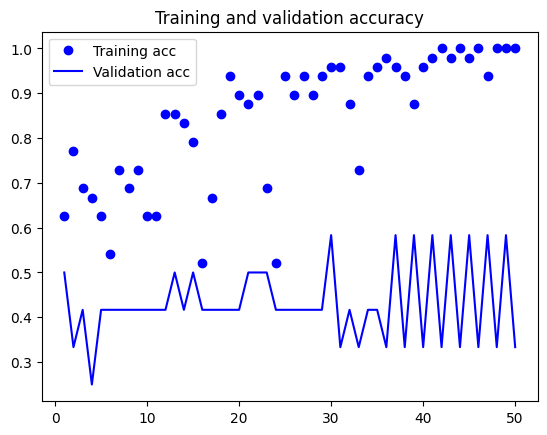

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

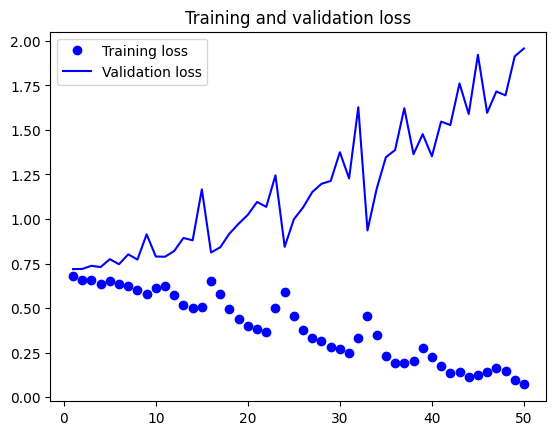

In [ ]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show;